In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


input_file_dir = "C:/Users/sherm/Desktop/workspace/LikeLion_Mid_team_14/data/raw/"
output_file_dir = "C:/Users/sherm/Desktop/workspace/LikeLion_Mid_team_14/data/processed/"
# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [41]:
df = pd.read_csv(input_file_dir+'경찰청_연도별 음주운전 재범자 단속 실적 현황_20241231.csv', encoding = 'euc-kr')

In [72]:
df_out=df[['년도', '최초비율','재범률']]

In [74]:
df_out.to_csv(output_file_dir + '경찰청_최초비율_재범률.csv')

In [33]:
# df_melted = df.melt(id_vars = ['년도'], value_vars = ['1회', '2회', '3회', '4회', '5회', '6회', '7회이상'])
# df_melted.columns = ['년도', '적발횟수', '연간적발횟수']
# df_melted =df_melted.sort_values(['년도', '적발횟수']).reset_index(drop = True)
# df_melted

,년도,적발횟수,연간적발횟수
0,2010,1회,179086
1,2010,2회,79314
2,2010,3회,30103
3,2010,4회,9705
4,2010,5회,3118
...,...,...,...
100,2024,3회,12613
101,2024,4회,6126
102,2024,5회,2723
103,2024,6회,1216


In [ ]:
79314 + 30103 + 9705 + 3118 + 903

In [43]:
df['전체']=df.iloc[:, 1:].sum(axis = 1)

In [44]:
df['재범자수'] = df.iloc[:, 2: -1].sum(axis = 1)

In [63]:
df['최초비율'] = df['1회'] / df['전체']

In [64]:
df['최초비율'] *= 100

In [79]:
df

,년도,1회,2회,3회,4회,5회,6회,7회이상,전체,재범자수,재범률,최초비율
0,2010,179086,79314,30103,9705,3118,903,478,302707,123621,40.838501,59.161499
1,2011,151488,67195,26172,8925,3017,929,487,258213,106725,41.332156,58.667844
2,2012,142803,63990,25607,9094,3179,1085,525,246283,103480,42.016704,57.983296
3,2013,154992,69863,28862,10391,3718,1285,725,269836,114844,42.560666,57.439334
4,2014,142258,64813,28183,10534,3775,1396,829,251788,109530,43.500882,56.499118
5,2015,135096,63018,27552,10810,4171,1556,897,243100,108004,44.427807,55.572193
6,2016,125736,57666,25856,10494,4131,1599,1117,226599,100863,44.511670,55.488330
7,2017,114585,51130,23396,9364,3896,1527,1289,205187,90602,44.155819,55.844181
8,2018,90168,40648,19025,7884,3189,1280,866,163060,72892,44.702563,55.297437
9,2019,73572,31487,14693,6416,2696,1102,806,130772,57200,43.740250,56.259750


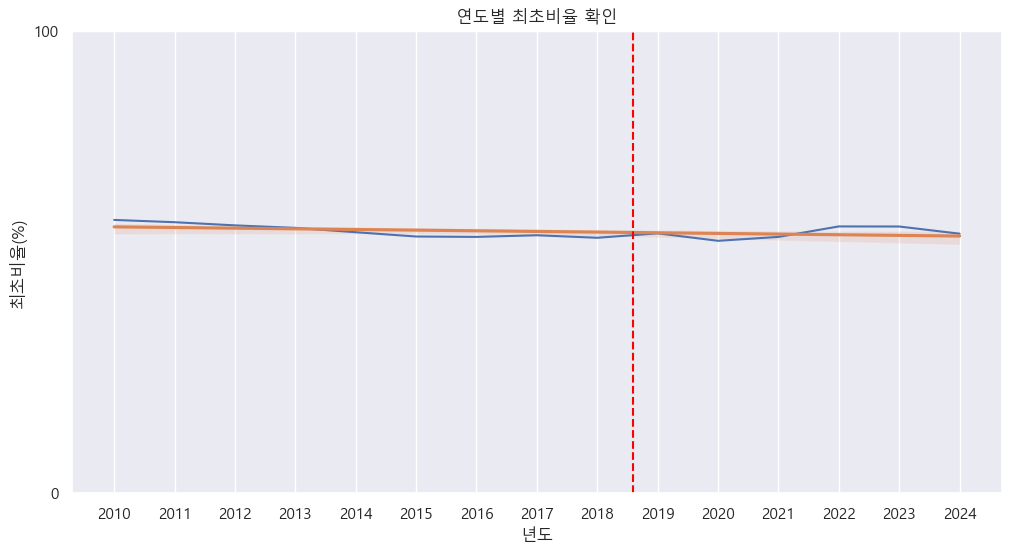

In [65]:
plt.title('연도별 최초비율 확인')
sns.lineplot(data = df, x = '년도', y = '최초비율')
sns.regplot(data=df, x='년도', y='최초비율', scatter=False, order=1) #추세선
plt.axvline(x = 2018.6, color = 'red', linestyle = '--')
plt.ylabel("최초비율(%)")
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
plt.yticks([0,100])
plt.xticks(df['년도'])
plt.show()

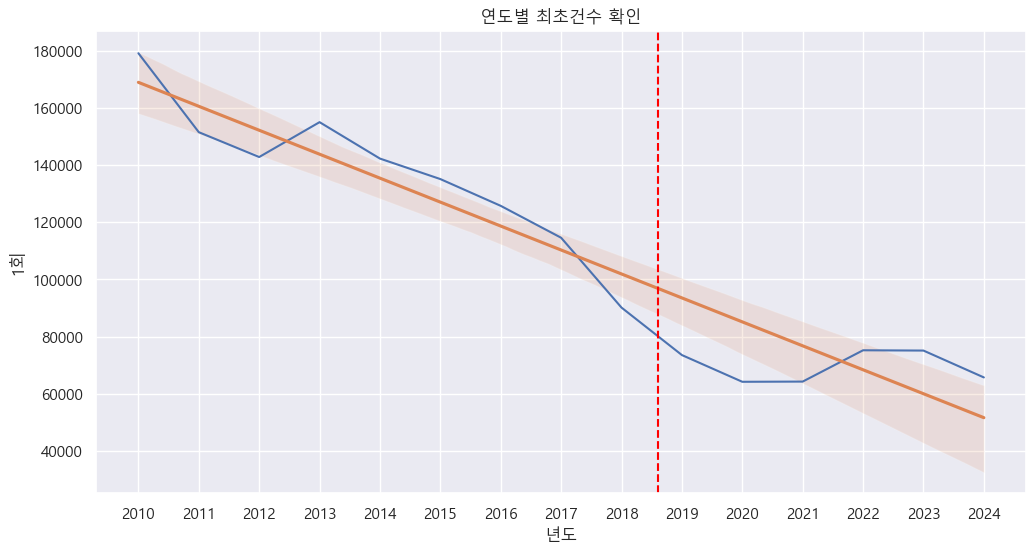

In [75]:
plt.title('연도별 최초건수 확인')
sns.lineplot(data = df, x = '년도', y = '1회')
sns.regplot(data=df, x='년도', y='1회', scatter=False, order=1) #추세선
plt.axvline(x = 2018.6, color = 'red', linestyle = '--')
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
plt.xticks(df['년도'])
plt.show()

In [71]:
import statsmodels.api as sm
df_yr=df[['년도','최초비율']]
df_yr
X = sm.add_constant(df_yr['년도'])
Y=df_yr['최초비율']

model = sm.OLS(Y,X).fit()
ci_90=model.conf_int(alpha=0.10)
model.summary()
#ci_90


C:\Users\sherm\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   최초비율   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     3.623
Date:                Fri, 30 May 2025   Prob (F-statistic):             0.0794
Time:                        16:28:37   Log-Likelihood:                -23.551
No. Observations:                  15   AIC:                             51.10
Df Residuals:                      13   BIC:                             52.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        343.3444    150.607      2.280      0.040      17.977     668.712
년도            -0.1421      0.075     -1.903      0.079      -0.303       0.019
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.196
Skew:                           0.265   Prob(JB):                        0.550
Kurtosis:                       1.723   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
df

,년도,1회,2회,3회,4회,5회,6회,7회이상,전체,재범자수,재범률,최초비율
0,2010,179086,79314,30103,9705,3118,903,478,302707,123621,40.838501,59.161499
1,2011,151488,67195,26172,8925,3017,929,487,258213,106725,41.332156,58.667844
2,2012,142803,63990,25607,9094,3179,1085,525,246283,103480,42.016704,57.983296
3,2013,154992,69863,28862,10391,3718,1285,725,269836,114844,42.560666,57.439334
4,2014,142258,64813,28183,10534,3775,1396,829,251788,109530,43.500882,56.499118
5,2015,135096,63018,27552,10810,4171,1556,897,243100,108004,44.427807,55.572193
6,2016,125736,57666,25856,10494,4131,1599,1117,226599,100863,44.511670,55.488330
7,2017,114585,51130,23396,9364,3896,1527,1289,205187,90602,44.155819,55.844181
8,2018,90168,40648,19025,7884,3189,1280,866,163060,72892,44.702563,55.297437
9,2019,73572,31487,14693,6416,2696,1102,806,130772,57200,43.740250,56.259750


### 재범률 확인

In [45]:
df['재범률'] = df['재범자수'] / df['전체']

In [48]:
df['재범률']*=100

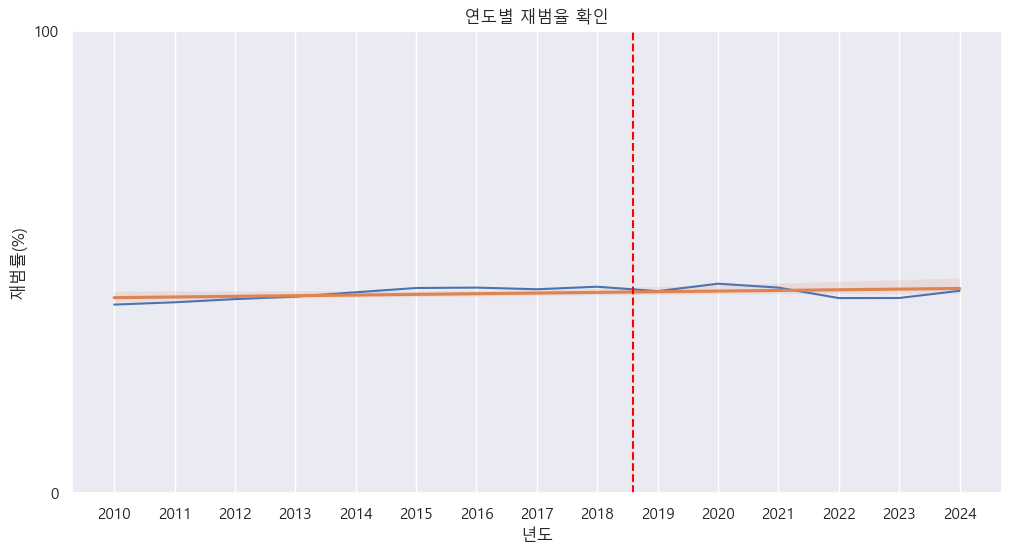

In [54]:
plt.title('연도별 재범율 확인')
sns.lineplot(data = df, x = '년도', y = '재범률')
sns.regplot(data=df, x='년도', y='재범률', scatter=False, order=1) #추세선
plt.axvline(x = 2018.6, color = 'red', linestyle = '--')
plt.ylabel("재범률(%)")
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
plt.yticks([0,100])
plt.xticks(df['년도'])
plt.show()

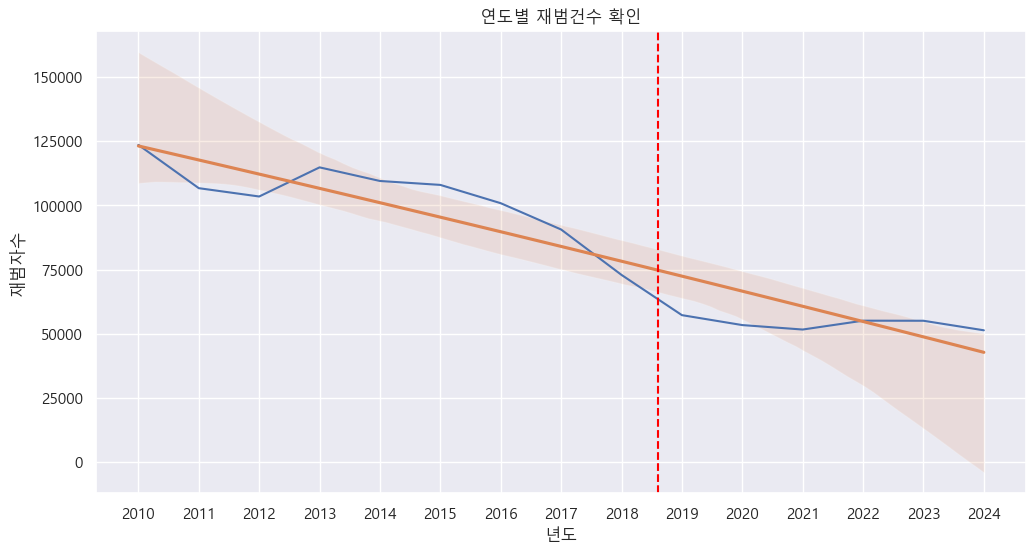

In [80]:
plt.title('연도별 재범건수 확인')
sns.lineplot(data = df, x = '년도', y = '재범자수')
sns.regplot(data=df, x='년도', y='재범자수', scatter=False, order=2) #추세선
plt.axvline(x = 2018.6, color = 'red', linestyle = '--')
# plt.annotate(
#     text = '윤창호 사건 발생 2018-09-25',
#     xy = (2018.5, 0.435),
#     xytext = (2021.5, 0.445),
#     fontsize = 9,
#     arrowprops = {'arrowstyle' : '->',
#                  'color' : 'black',
#                  'linewidth' : 2}
# )
plt.xticks(df['년도'])
plt.show()

- 재범률이 전체 0.41 ~ 0.45 정도로 드라마틱한 변화는 없지만 다른 지표들이 2010년 이후 음주 사고가 크게 감소하는 추세와는 상반되게 상승된다. 2018년 윤창호 사건 이후로 감소하던 추세가가 23년도에서 다시 등반된다. 
- 19년도 ~ 20년도 사이는 코로나의 영향으로 주류 판매업소의 야간 영업이 통제되었지만 음주 단속이 일제 검문식 단속에서 의심 운전자만을 대상으로 선별하여 단속하는 등 단속이 약해졌다는 정보가 있다.(재범률이 상승하는 시기) 그러나 음주운전 사고가 증가하자 비접촉식 감지기를 도입하여 2020년대 이후로 재범률이 다시 줄어든 것으로 추측 된다. 

In [56]:
print(np.mean(df['재범률']))
print(np.max(df['재범률']))
print(np.min(df['재범률']))

43.332496698478195
45.359807399467456
40.838500596286174


In [ ]:
z= 1.96
freedom= 2024 - 2010 + 1 - 2

moe= z*((p_hat*(1-p_hat)/n)**0.5)

In [59]:
import statsmodels.api as sm
df_yr=df[['년도','재범률']]
df_yr
X = sm.add_constant(df_yr['년도'])
Y=df_yr['재범률']

In [60]:
model = sm.OLS(Y,X).fit()

In [62]:
model.

C:\Users\sherm\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    재범률   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     3.623
Date:                Fri, 30 May 2025   Prob (F-statistic):             0.0794
Time:                        16:05:54   Log-Likelihood:                -23.551
No. Observations:                  15   AIC:                             51.10
Df Residuals:                      13   BIC:                             52.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -243.3444    150.607     -1.616      0.130    -568.712      82.023
년도             0.1421      0.075      1.903      0.079      -0.019       0.303
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.196
Skew:                          -0.265   Prob(JB):                        0.550
Kurtosis:                       1.723   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 음주운전 재범률/초범률 정리 for 현황파악 (10~24)

### 분석 목적
- 전체 음주 사건 중 수치 변화와 비율 변화를 시각화, 분석함으로 현재 정책들의 유효성을 확인 해보려함

### 음주운전 건수의 변화
- 전체 음주운전 사건 중 초범자와 재범자 모두 일관되게 감소하는 효과를 보임
- 전반적으로 감소하는 모양세를 보임

### 음주운전 비율의 변화
- 전체 음주운전 사건 중 초범률과 재범률 모두 억제하지 못하는 모습을 보임

### 1차 결론
- 전체적인 수 자체는 줄고 있지만 범죄율 자체를 줄이지 못하는 모습 => 남은 비율이 고정층일 가능성이 높다
- 여기서 나올 수 있는 시사점
- 1. 현재의 위치는 지수감쇠 사례의 한계치일 수도 있고 아닐 수도 있다 -> 증명 불가 데이터 X
      1. 현재의 법, 단속 증가의 부분은 비용 손실이 너무 클 수도 있다 -> 경찰 인원수 증감 확인
      2. 다른 부분들(교육/마케팅등)을 더 강화하는 방향이 더 효과적일 수도 있다.
- 한계치의 근거 